In [12]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-Per-Policy_Intra-Cluster_Consensus_Analysis.csv')

# 过滤条件：K值=7 且 共识聚类ID=0到6
filtered_df = df[(df['K值'] == 7) & (df['共识聚类ID'].isin(range(0, 8)))] 

# 保存到新文件
filtered_df.to_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-K7-Per-Policy_Intra-Cluster_Consensus_Analysis.csv', index=False) 

# 打印结果
print(f"找到 {len(filtered_df)} 行数据")
print(filtered_df)


找到 188 行数据
     K值  共识聚类ID  簇内国家数             L2共识政策  \
626   7       1     18     LEV2_SEC_B_MBI   
627   7       1     18     LEV2_SEC_B_MBI   
628   7       1     18     LEV2_SEC_B_MBI   
629   7       1     18    LEV2_SEC_B_NMBI   
630   7       1     18  LEV2_CROSS_SEC_CG   
..   ..     ...    ...                ...   
809   7       7      7     LEV2_SEC_T_MBI   
810   7       7      7     LEV2_SEC_T_MBI   
811   7       7      7     LEV2_SEC_T_MBI   
812   7       7      7    LEV2_SEC_T_NMBI   
813   7       7      7    LEV2_SEC_T_NMBI   

                                    L2共识政策中文名              L1分类  \
626      Buildings – market-based instruments   Incentive-based   
627      Buildings – market-based instruments   Incentive-based   
628      Buildings – market-based instruments   Incentive-based   
629  Buildings – non market-based instruments        Regulatory   
630                        Climate governance  Commitment-based   
..                                        ... 

In [13]:
import pandas as pd 

# 读取数据
df = pd.read_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-K7-Per-Policy_Intra-Cluster_Consensus_Analysis.csv')

# L2共识政策到缩写的映射表
abbrev_mapping = {
    'Electricity – market-based instruments': 'EM',
    'Transport – market-based instruments': 'TM',
    'Buildings – market-based instruments': 'BM',
    'Industry – market-based instruments': 'IM',
    'Electricity – non market-based instruments': 'ENM',
    'Transport – non market-based instruments': 'TNM',
    'Buildings – non market-based instruments': 'BNM',
    'Industry – non market-based instruments': 'INM',
    'International public finance': 'IPF',
    'Fossil fuel production policies': 'FFP',
    'GHG emissions targets': 'ET',
    'Climate governance': 'CG',
    'International climate co-operation': 'ICC',
    'GHG emissions data and reporting': 'EDR',
    'Public Research, Development and Demonstration': 'PRD'
}

# 添加Abbrev_L2列
df['Abbrev_L2'] = df['L2共识政策中文名'].map(abbrev_mapping)

# 添加Starting, Trend, Ending的缩写列(取首字母大写)
df['Abbrev_Starting'] = df['Starting'].str[0].str.upper()
df['Abbrev_Trend'] = df['Trend'].str[0].str.upper()
df['Abbrev_Ending'] = df['Ending'].str.split().str[0].str[0].str.upper()  # 对于"High Share"这样的,取第一个单词的首字母

# 选择需要保留的列
columns_to_keep = [
    'K值',
    '共识聚类ID',
    'L2共识政策中文名',
    'L1分类',
    '政策聚类ID',
    'Starting',
    'Trend',
    'Ending',
    '共识占比',
    'Abbrev_L2',
    'Abbrev_Starting',
    'Abbrev_Trend',
    'Abbrev_Ending'
]

df_output = df[columns_to_keep]

# 保存结果
df_output.to_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-K7-Per-Policy_Intra-Cluster_Consensus_Analysis.csv', index=False, encoding='utf-8-sig')

print("处理完成!")
print(f"原始数据行数: {len(df)}")
print(f"输出数据行数: {len(df_output)}")
print("\n前几行预览:")
print(df_output.head())
print("\n新增列的唯一值:")
print(f"Abbrev_Starting: {df_output['Abbrev_Starting'].unique()}")
print(f"Abbrev_Trend: {df_output['Abbrev_Trend'].unique()}")
print(f"Abbrev_Ending: {df_output['Abbrev_Ending'].unique()}")


处理完成!
原始数据行数: 188
输出数据行数: 188

前几行预览:
   K值  共识聚类ID                                 L2共识政策中文名              L1分类  \
0   7       1      Buildings – market-based instruments   Incentive-based   
1   7       1      Buildings – market-based instruments   Incentive-based   
2   7       1      Buildings – market-based instruments   Incentive-based   
3   7       1  Buildings – non market-based instruments        Regulatory   
4   7       1                        Climate governance  Commitment-based   

   政策聚类ID Starting        Trend        Ending      共识占比 Abbrev_L2  \
0       2     High  Fluctuating  Medium Share  0.722222        BM   
1       0      Low       Rising     Low Share  0.166667        BM   
2       1      Low       Rising    High Share  0.111111        BM   
3       0      Low       Stable  Medium Share  1.000000       BNM   
4       1      Low       Stable     Low Share  0.500000        CG   

  Abbrev_Starting Abbrev_Trend Abbrev_Ending  
0               H            F       


正在生成共识聚类ID = 1 的图表...


KeyError: 'medium'

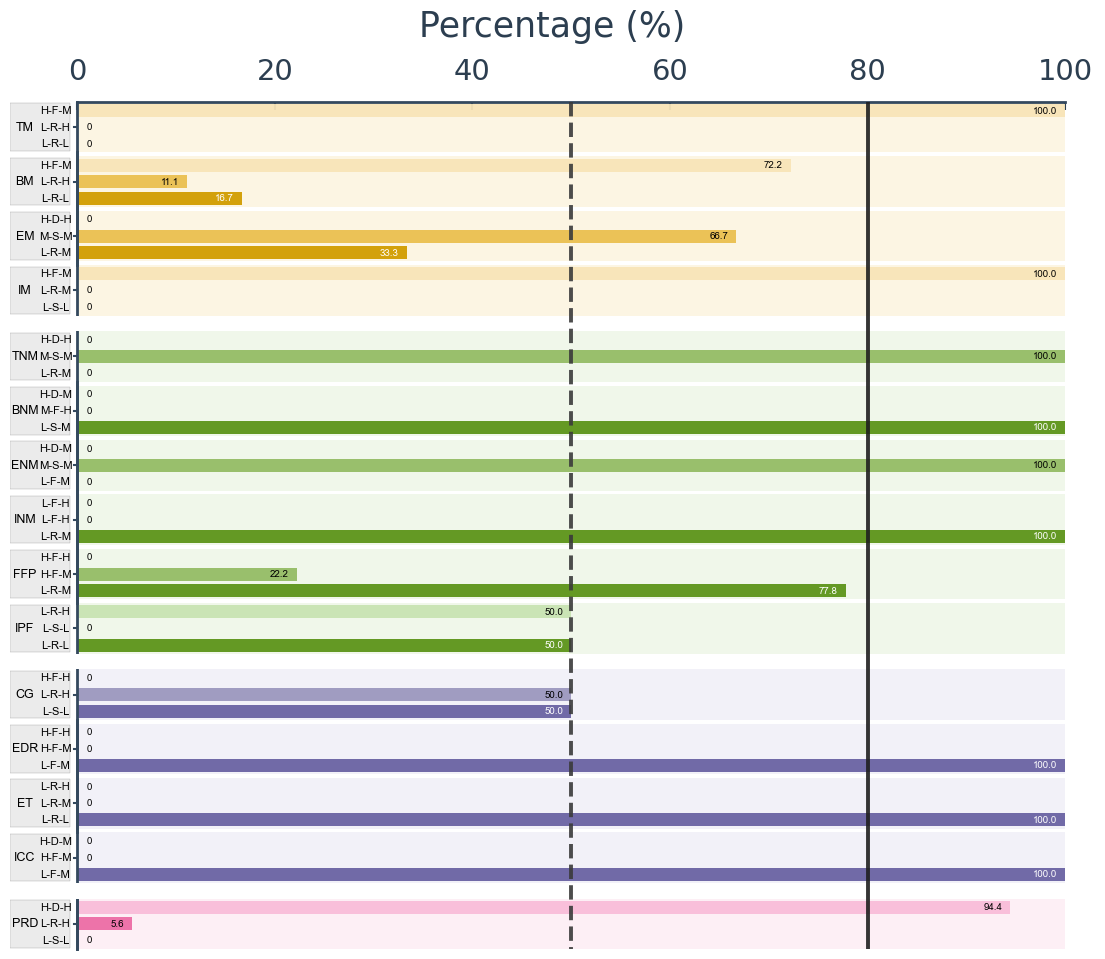

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import json
import os
from general_pic_setup import setup_mpl_single2

setup_mpl_single2()

# 读取数据
df = pd.read_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-K7-Per-Policy_Intra-Cluster_Consensus_Analysis.csv')
with open(r'F:\Desktop\CAMPF_Supplementary\data\3-2-Human_Recognition_Mode_txt.json', 'r', encoding='utf-8') as f:
    recognition_data = json.load(f)

output_dir = r'F:\Desktop\CAMPF_Supplementary\data\4-3-Policy_Consensus_Map\new_vislualizations_everypolicy'
os.makedirs(output_dir, exist_ok=True)


def get_combination_from_json(l1_category, l2_policy, cluster_id):
    """从JSON获取组合代码缩写，格式: L-R-M"""
    policy_data = recognition_data[l1_category][l2_policy][str(cluster_id)]
    starting_abbrev = policy_data['Starting'][0].upper()
    trend_abbrev = policy_data['Trend'][0].upper()
    ending_abbrev = policy_data['Ending'].split()[0][0].upper()
    return f"{starting_abbrev}-{trend_abbrev}-{ending_abbrev}"


def get_combination_details(l1_category, l2_policy, cluster_id):
    """获取完整组合信息用于排序"""
    policy_data = recognition_data[l1_category][l2_policy][str(cluster_id)]
    return {
        'starting': policy_data['Starting'][0].upper(),
        'ending': policy_data['Ending'].split()[0][0].upper(),
        'trend': policy_data['Trend'][0].upper(),
        'abbrev': f"{policy_data['Starting'][0].upper()}-{policy_data['Trend'][0].upper()}-{policy_data['Ending'].split()[0][0].upper()}"
    }


def get_sort_key(combo_details):
    """排序规则: Starting(L<M<H) > Ending(L<M<H) > Trend(R<S<F<D)"""
    starting_order = {'L': 0, 'M': 1, 'H': 2}
    ending_order = {'L': 0, 'M': 1, 'H': 2}
    trend_order = {'R': 0, 'S': 1, 'F': 2, 'D': 3}
    
    return (
        starting_order.get(combo_details['starting'], 999),
        ending_order.get(combo_details['ending'], 999),
        trend_order.get(combo_details['trend'], 999)
    )


#政策名称排序函数 - 基于完整名称的关键词
def custom_policy_sort_key(policy_abbrev, full_policy_name):
    """
    排序规则: 
    - Transport (market-based) > Buildings (non market-based) > Electricity > Industry > 其他
    根据完整政策名称判断类别
    返回 (优先级组别, 组内索引, 政策名)
    """
    # 特殊规则: Transport market-based 优先于 Buildings non market-based
    if 'Transport' in full_policy_name and 'market-based' in full_policy_name:
        return (0, 0, policy_abbrev)
    elif 'Buildings' in full_policy_name and 'non market-based' in full_policy_name:
        return (0, 1, policy_abbrev)
    
    # 其他政策的优先级顺序
    priority_order = ['Buildings', 'Electricity', 'Industry', 'Transport']
    
    # 根据完整政策名称检查关键词
    for idx, priority_name in enumerate(priority_order):
        if priority_name in full_policy_name:
            return (0, idx + 2, policy_abbrev)  # +2 是因为前面有两个特殊位置
    
    # 其他政策排在后面
    return (1, 0, policy_abbrev)


# 颜色配置
color_groups = {
    'Incentive-based': {
        'base': '#FCF3DD',
        'colors': ['#D19D00', '#EBC04F', '#F8E5B8']
    },
    'Regulatory': {
        'base': '#EDF6E5',
        'colors': ['#5C9419', '#95BC65', '#C8E3B3']
    },
    'Commitment-based': {
        'base': '#EFEEF7',
        'colors': ['#6A63A3', '#9C98BE', '#CFCEDF']
    },
    'Research and Development (R&D)': {
        'base': '#FDEBF3',
        'colors': ['#D32679', '#ED6CA5', '#F9BDD9']
    }
}


# 直接获取所有共识聚类ID
consensus_cluster_ids = df['共识聚类ID'].unique()

for consensus_cluster_id in consensus_cluster_ids:
    print(f"\n正在生成共识聚类ID = {consensus_cluster_id} 的图表...")
    
    df_cluster = df[df['共识聚类ID'] == consensus_cluster_id].copy()
    
    # 添加组合列
    df_cluster['combination_json'] = df_cluster.apply(
        lambda row: get_combination_from_json(row['L1分类'], row['L2共识政策中文名'], row['政策聚类ID']),
        axis=1
    )
    
    l1_categories = df_cluster['L1分类'].unique()
    
    fig, ax = plt.subplots(figsize=(14, 11), facecolor='white')
    ax.set_facecolor('white')
    
    # 组织政策数据
    policy_groups = []
    policy_data = {}
    
    for l1_category in l1_categories:
        group_data = []
        df_l1 = df_cluster[df_cluster['L1分类'] == l1_category]
        
        # 【修改】获取政策列表，创建映射用于排序
        policy_abbrev_list = df_l1['Abbrev_L2'].unique()
        
        # 创建缩写到完整名称的映射
        abbrev_to_fullname = {}
        for abbrev in policy_abbrev_list:
            df_temp = df_l1[df_l1['Abbrev_L2'] == abbrev]
            if not df_temp.empty:
                abbrev_to_fullname[abbrev] = df_temp.iloc[0]['L2共识政策中文名']
        
        # 排序缩写列表
        sorted_policy_abbrevs = sorted(
            policy_abbrev_list, 
            key=lambda x: custom_policy_sort_key(x, abbrev_to_fullname.get(x, x))
        )
        
        for policy_name in sorted_policy_abbrevs:  # 使用排序后的列表
            df_policy = df_l1[df_l1['Abbrev_L2'] == policy_name].copy()
            l2_full_name = df_policy.iloc[0]['L2共识政策中文名']
            
            cluster_data_list = []
            for cluster_id in range(3):
                combo_details = get_combination_details(l1_category, l2_full_name, cluster_id)
                cluster_data = df_policy[df_policy['政策聚类ID'] == cluster_id]
                value = cluster_data.iloc[0]['共识占比'] * 100 if not cluster_data.empty else 0
                
                cluster_data_list.append({
                    'combo_details': combo_details,
                    'value': value,
                    'cluster_id': cluster_id
                })
            
            cluster_data_list.sort(key=lambda x: get_sort_key(x['combo_details']))
            
            policy_data[policy_name] = {
                'combinations': [item['combo_details']['abbrev'] for item in cluster_data_list],
                'values': [item['value'] for item in cluster_data_list],
                'cluster_ids': [item['cluster_id'] for item in cluster_data_list]
            }
            
            group_key = l1_category if l1_category in color_groups else 'Research and Development (R&D)'
            group_data.append((policy_name, group_key))
        
        if group_data:
            policy_groups.append(group_data)
    
    all_policies = [policy for group in policy_groups for policy in group]
    
    # 布局参数
    policy_center_x = -5.3
    combo_col_center = -2.2
    big_bar_height = 0.7
    small_bar_height = 0.18
    within_group_gap = small_bar_height * 0.3
    white_rect_height = small_bar_height * 1.2
    between_group_gap = white_rect_height
    
    # 计算Y位置
    y_positions = []
    group_boundaries = []
    current_y = 0
    for group_idx, group in enumerate(policy_groups):
        for policy_idx in range(len(group)):
            y_positions.append(current_y)
            if policy_idx < len(group) - 1:
                current_y += big_bar_height + within_group_gap
            else:
                current_y += big_bar_height
        
        if group_idx < len(policy_groups) - 1:
            gap_start = current_y
            current_y += between_group_gap
            gap_end = current_y
            group_boundaries.append((gap_start, gap_end))
    
    policy_label_color = '#000000'
    
    # 绘制每个政策条
    for y_pos, (policy_name, group) in zip(y_positions, all_policies):
        group_colors = color_groups[group]
        data = policy_data[policy_name]
        values = data['values']
        combinations = data['combinations']
        
        # 背景大bar
        ax.barh(y_pos, 100, height=big_bar_height, color=group_colors['base'], alpha=0.8)
        
        bar_top = y_pos + big_bar_height / 2
        bar_bottom = y_pos - big_bar_height / 2
        available_space = big_bar_height - 3 * small_bar_height
        gap = available_space / 4 - 0.01
        colors = group_colors['colors']
        
        # 三个小bar
        bar_positions = [
            bar_top - gap - small_bar_height / 2,
            y_pos,
            bar_bottom + gap + small_bar_height / 2
        ]
        
        for i, (bar_y, value, combo) in enumerate(zip(bar_positions, values, combinations)):
            bar_width = min(value, 100)
            ax.barh(bar_y, bar_width, height=small_bar_height, color=colors[i], alpha=0.95, zorder=3)
            
            # 数值标签
            if value > 0:
                text_x = min(bar_width - 0.8, 99.2)
                text_color = 'white' if i == 0 else 'black'
                ax.text(text_x, bar_y, f'{value:.1f}', va='center', ha='right',
                        fontsize=7, color=text_color, family='Arial')
            else:
                ax.text(1, bar_y, '0', va='center', ha='left',
                        fontsize=7, color='black', family='Arial')
            
            # 组合标签
            ax.text(combo_col_center, bar_y, combo, va='center', ha='center',
                    fontsize=8, color=policy_label_color, family='Arial')
        
        # 政策名称
        ax.text(policy_center_x, y_pos, policy_name, va='center', ha='center',
                fontsize=9, color=policy_label_color, family='Arial')
        
        # 左侧灰背景矩形框
        rect = mpatches.Rectangle(
            (policy_center_x - 1.5, y_pos - big_bar_height / 2 + 0.02),
            combo_col_center + 1.5 - (policy_center_x - 1.5),
            big_bar_height - 0.04,
            facecolor='#EBEBEB', edgecolor='#999999', linewidth=0.25
        )
        ax.add_patch(rect)
    
    # Y轴范围
    y_line_top = y_positions[0] - big_bar_height / 2
    y_line_bottom = y_positions[-1] + big_bar_height / 2
    
    ax.set_xlim(-6.8, 103)
    ax.set_ylim(y_line_bottom, y_line_top)
    
    # 50%和80%截断线
    ax.plot([50, 50], [y_line_top, y_line_bottom], color='#3a3a3a', 
            linewidth=2.8, linestyle='--', zorder=1000, alpha=0.9)
    ax.plot([80, 80], [y_line_top, y_line_bottom], color='#1f1f1f', 
            linewidth=2.8, linestyle='-', zorder=1000, alpha=0.9)
    
    # X轴设置
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Percentage (%)', labelpad=15, color='#2c3e50')
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.tick_params(axis='x', colors='#2c3e50', length=6, width=1.5)
    
    ax.set_yticks([])
    ax.yaxis.set_label_coords(-0.02, 0.02)
    
    # 左侧主线
    ax.plot([0, 0], [y_line_top, y_line_bottom], color='#34495e', 
            linewidth=2, zorder=10, clip_on=False)
    
    # 边框
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_color('#34495e')
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_bounds(0, 100)
    ax.spines['top'].set_zorder(10)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # 每个L1组左侧刻度
    tick_length = 0.3
    current_idx = 0
    for group in policy_groups:
        group_y_positions = y_positions[current_idx:current_idx + len(group)]
        
        if group_y_positions:
            y_start = group_y_positions[0] + big_bar_height / 2
            y_end = group_y_positions[-1] - big_bar_height / 2
            
            ax.plot([0, 0], [y_start, y_end], color='#34495e', linewidth=2, zorder=10, clip_on=False)
            
            for y_pos in group_y_positions:
                ax.plot([0, -tick_length], [y_pos, y_pos], color='#34495e',
                        linewidth=1.5, zorder=10, clip_on=False)
        
        current_idx += len(group)
    
    # 组间白色间隔
    for gap_start, gap_end in group_boundaries:
        rect = plt.Rectangle(
            (-6.8, gap_start - 2 * small_bar_height + 0.01),
            96.8, white_rect_height,
            facecolor='white', zorder=100, clip_on=False
        )
        ax.add_patch(rect)
    
    plt.title(f'Country Group {consensus_cluster_id}',
              pad=20, color='#2c3e50')
    
    plt.tight_layout(pad=0.5)
    output_path = os.path.join(output_dir, f'policy_vertical_bars_cluster_{consensus_cluster_id}.png')
    plt.savefig(output_path, dpi=600, bbox_inches='tight', facecolor='white', pad_inches=0.05)
    plt.close()


In [2]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import pandas as pd
import json
import os
from general_pic_setup import setup_mpl_single2
import matplotlib as mpl

setup_mpl_single2()


# 读取数据
df = pd.read_csv(r'F:\Desktop\CAMPF_Supplementary\data\4-3-K7-Per-Policy_Intra-Cluster_Consensus_Analysis.csv')
with open(r'F:\Desktop\CAMPF_Supplementary\data\3-2-Human_Recognition_Mode_txt.json', 'r', encoding='utf-8') as f:
    recognition_data = json.load(f)

output_dir = r'F:\Desktop\CAMPF_Supplementary\data\4-3-Policy_Consensus_Map\new_vislualizations_everypolicy'
os.makedirs(output_dir, exist_ok=True)


def get_combination_from_json(l1_category, l2_policy, cluster_id):
    """从JSON获取组合代码缩写,格式: L-R-M"""
    policy_data = recognition_data[l1_category][l2_policy][str(cluster_id)]
    starting_abbrev = policy_data['Starting'][0].upper()
    trend_abbrev = policy_data['Trend'][0].upper()
    ending_abbrev = policy_data['Ending'].split()[0][0].upper()
    return f"{starting_abbrev}-{trend_abbrev}-{ending_abbrev}"


def get_combination_details(l1_category, l2_policy, cluster_id):
    """获取完整组合信息用于排序"""
    policy_data = recognition_data[l1_category][l2_policy][str(cluster_id)]
    return {
        'starting': policy_data['Starting'][0].upper(),
        'ending': policy_data['Ending'].split()[0][0].upper(),
        'trend': policy_data['Trend'][0].upper(),
        'abbrev': f"{policy_data['Starting'][0].upper()}-{policy_data['Trend'][0].upper()}-{policy_data['Ending'].split()[0][0].upper()}"
    }


def get_sort_key(combo_details):
    """排序规则: Starting(L<M<H) > Ending(L<M<H) > Trend(R<S<F<D)"""
    starting_order = {'L': 0, 'M': 1, 'H': 2}
    ending_order = {'L': 0, 'M': 1, 'H': 2}
    trend_order = {'R': 0, 'S': 1, 'F': 2, 'D': 3}
    
    return (
        starting_order.get(combo_details['starting'], 999),
        ending_order.get(combo_details['ending'], 999),
        trend_order.get(combo_details['trend'], 999)
    )


# 政策名称排序函数 - 基于完整名称的关键词
def custom_policy_sort_key(policy_abbrev, full_policy_name):
    """
    排序规则: 
    - Transport (market-based) > Buildings (non market-based) > Electricity > Industry > 其他
    根据完整政策名称判断类别
    返回 (优先级组别, 组内索引, 政策名)
    """
    # 特殊规则: Transport market-based 优先于 Buildings non market-based
    if 'Transport' in full_policy_name and 'market-based' in full_policy_name:
        return (0, 0, policy_abbrev)
    elif 'Buildings' in full_policy_name and 'non market-based' in full_policy_name:
        return (0, 1, policy_abbrev)
    
    # 其他政策的优先级顺序
    priority_order = ['Buildings', 'Electricity', 'Industry', 'Transport']
    
    # 根据完整政策名称检查关键词
    for idx, priority_name in enumerate(priority_order):
        if priority_name in full_policy_name:
            return (0, idx + 2, policy_abbrev)  # +2 是因为前面有两个特殊位置
    
    # 其他政策排在后面
    return (1, 0, policy_abbrev)


# 颜色配置
color_groups = {
    'Incentive-based': {
        'base': '#FCF3DD',
        'colors': ['#D19D00', '#EBC04F', '#F8E5B8']
    },
    'Regulatory': {
        'base': '#EDF6E5',
        'colors': ['#5C9419', '#95BC65', '#C8E3B3']
    },
    'Commitment-based': {
        'base': '#EFEEF7',
        'colors': ['#6A63A3', '#9C98BE', '#CFCEDF']
    },
    'Research and Development (R&D)': {
        'base': '#FDEBF3',
        'colors': ['#D32679', '#ED6CA5', '#F9BDD9']
    }
}


# 直接获取所有共识聚类ID
consensus_cluster_ids = df['共识聚类ID'].unique()

for consensus_cluster_id in consensus_cluster_ids:
    print(f"\n正在生成共识聚类ID = {consensus_cluster_id} 的图表...")
    
    df_cluster = df[df['共识聚类ID'] == consensus_cluster_id].copy()
    
    # 添加组合列
    df_cluster['combination_json'] = df_cluster.apply(
        lambda row: get_combination_from_json(row['L1分类'], row['L2共识政策中文名'], row['政策聚类ID']),
        axis=1
    )
    
    l1_categories = df_cluster['L1分类'].unique()
    
    fig, ax = plt.subplots(figsize=(13, 11), facecolor='white')
    ax.set_facecolor('white')
    
    # 组织政策数据
    policy_groups = []  # [[(policy_name, group_key), ...], ...]  每个内层 list 是一个 L1 组
    policy_data = {}    # {policy_name: {...}}
    
    for l1_category in l1_categories:
        group_data = []
        df_l1 = df_cluster[df_cluster['L1分类'] == l1_category]
        
        # 获取政策列表,创建映射用于排序
        policy_abbrev_list = df_l1['Abbrev_L2'].unique()
        
        # 创建缩写到完整名称的映射
        abbrev_to_fullname = {}
        for abbrev in policy_abbrev_list:
            df_temp = df_l1[df_l1['Abbrev_L2'] == abbrev]
            if not df_temp.empty:
                abbrev_to_fullname[abbrev] = df_temp.iloc[0]['L2共识政策中文名']
        
        # 排序缩写列表
        sorted_policy_abbrevs = sorted(
            policy_abbrev_list, 
            key=lambda x: custom_policy_sort_key(x, abbrev_to_fullname.get(x, x))
        )
        
        for policy_name in sorted_policy_abbrevs:  # 使用排序后的列表
            df_policy = df_l1[df_l1['Abbrev_L2'] == policy_name].copy()
            l2_full_name = df_policy.iloc[0]['L2共识政策中文名']
            
            cluster_data_list = []
            for cluster_id in range(3):
                combo_details = get_combination_details(l1_category, l2_full_name, cluster_id)
                cluster_data = df_policy[df_policy['政策聚类ID'] == cluster_id]
                value = cluster_data.iloc[0]['共识占比'] * 100 if not cluster_data.empty else 0
                
                cluster_data_list.append({
                    'combo_details': combo_details,
                    'value': value,
                    'cluster_id': cluster_id
                })
            
            cluster_data_list.sort(key=lambda x: get_sort_key(x['combo_details']))
            
            policy_data[policy_name] = {
                'combinations': [item['combo_details']['abbrev'] for item in cluster_data_list],
                'values': [item['value'] for item in cluster_data_list],
                'cluster_ids': [item['cluster_id'] for item in cluster_data_list]
            }
            
            group_key = l1_category if l1_category in color_groups else 'Research and Development (R&D)'
            group_data.append((policy_name, group_key))
        
        if group_data:
            policy_groups.append(group_data)
    
    all_policies = [policy for group in policy_groups for policy in group]
    
    # 布局参数
    policy_center_x = -6
    combo_col_center = -2.2
    big_bar_height = 0.7
    small_bar_height = 0.18
    within_group_gap = small_bar_height * 0.3
    white_rect_height = small_bar_height * 1.2   # 组间垂直间隙高度(保留原设置)
    between_group_gap = white_rect_height

    # 左侧长彩色 patch: 横向从更左的位置到 100,增加宽度
    left_patch_x_left = -8.5   # 从-6.8改为-8.5,增加左侧宽度
    left_patch_x_right = 100.0 # 覆盖到 100(整行背景)
    # 垂直方向额外延伸一点,让它"盖满"类里的所有政策
    extra_y_for_patch = within_group_gap / 2.0
    
    # 计算Y位置
    y_positions = []
    group_boundaries = []  # [(gap_start, gap_end), ...] 用来画组间白色间隙
    current_y = 0
    for group_idx, group in enumerate(policy_groups):
        for policy_idx in range(len(group)):
            y_positions.append(current_y)
            if policy_idx < len(group) - 1:
                current_y += big_bar_height + within_group_gap
            else:
                current_y += big_bar_height
        
        if group_idx < len(policy_groups) - 1:
            gap_start = current_y
            current_y += between_group_gap
            gap_end = current_y
            group_boundaries.append((gap_start, gap_end))
    
    policy_label_color = '#000000'

    # ========= 按 L1 组画左侧长彩色 patch,每组一个,颜色为该类最浅色 =========
    current_idx = 0
    for group in policy_groups:
        group_y_positions = y_positions[current_idx:current_idx + len(group)]
        if not group_y_positions:
            current_idx += len(group)
            continue

        # 该组的政策类型 key(比如 'Incentive-based')
        group_key = group[0][1]
        group_colors = color_groups.get(group_key, color_groups['Research and Development (R&D)'])
        # 取该类型最浅的颜色(假定列表最后一个是最浅)
        patch_color = group_colors['colors'][-1]

        # 这一类所有政策的最上边和最下边
        group_min_y = min(group_y_positions) - big_bar_height / 2.0 - extra_y_for_patch
        group_max_y = max(group_y_positions) + big_bar_height / 2.0 + extra_y_for_patch

        rect_y = group_min_y
        rect_height = group_max_y - group_min_y

        # 矩形在 x 方向的范围: 从最左到 100
        rect_width = left_patch_x_right - left_patch_x_left

        rect = mpatches.Rectangle(
            (left_patch_x_left, rect_y),
            rect_width,
            rect_height,
            facecolor=patch_color,
            edgecolor='none',
            alpha=0.6,
            zorder=0     # 放在最底层,后面的柱子压在上面
        )
        ax.add_patch(rect)

        current_idx += len(group)
    # ========= 左侧长 patch 结束 =========
    
    # 绘制每个政策条
    for y_pos, (policy_name, group) in zip(y_positions, all_policies):
        group_colors = color_groups[group]
        data = policy_data[policy_name]
        values = data['values']
        combinations = data['combinations']
        
        # 背景大bar
        ax.barh(y_pos, 100, height=big_bar_height, color=group_colors['base'], alpha=0.8)
        
        bar_top = y_pos + big_bar_height / 2
        bar_bottom = y_pos - big_bar_height / 2
        available_space = big_bar_height - 3 * small_bar_height
        gap = available_space / 4 - 0.01
        colors = group_colors['colors']
        
        # 三个小bar
        bar_positions = [
            bar_top - gap - small_bar_height / 2,
            y_pos,
            bar_bottom + gap + small_bar_height / 2
        ]
        
        for i, (bar_y, value, combo) in enumerate(zip(bar_positions, values, combinations)):
            bar_width = min(value, 100)
            ax.barh(bar_y, bar_width, height=small_bar_height, color=colors[i], alpha=0.95, zorder=3)
            
            # 数值标签
            if value > 0:
                text_x = min(bar_width - 0.8, 99.2)
                text_color = 'white' if i == 0 else 'black'
                ax.text(text_x, bar_y, f'{value:.1f}', va='center', ha='right',
                        fontsize=7, color=text_color, family='Arial')
            else:
                ax.text(1, bar_y, '0', va='center', ha='left',
                        fontsize=7, color='black', family='Arial')
            
            # 组合标签 - 保持原字体大小8
            ax.text(combo_col_center, bar_y, combo, va='center', ha='center',
                    fontsize=8, color=policy_label_color, family='Arial')
        
        # 政策名称 - 增大字体到11,与X轴标签一致
        ax.text(policy_center_x, y_pos, policy_name, va='center', ha='center',
                fontsize=12, color=policy_label_color, family='Arial')
    
    # Y轴范围
    y_line_top = y_positions[0] - big_bar_height / 2
    y_line_bottom = y_positions[-1] + big_bar_height / 2
    
    ax.set_xlim(-8.5, 103)  # 调整左边界以适应更宽的patch
    ax.set_ylim(y_line_bottom, y_line_top)
    
    # 50%和80%截断线
    ax.plot([50, 50], [y_line_top, y_line_bottom], color='#3a3a3a', 
            linewidth=2.8, linestyle='--', zorder=1000, alpha=0.9)
    ax.plot([80, 80], [y_line_top, y_line_bottom], color='#1f1f1f', 
            linewidth=2.8, linestyle='-', zorder=1000, alpha=0.9)
    
    # X轴设置
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Percentage (%)', labelpad=15,fontsize=23, color='#2c3e50')
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.tick_params(axis='x', colors='#2c3e50', length=6, width=1.5,direction='out')
    
    ax.set_yticks([])
    ax.yaxis.set_label_coords(-0.02, 0.02)
    
    # 左侧主线
    ax.plot([0, 0], [y_line_top, y_line_bottom], color='#34495e', 
            linewidth=2, zorder=10, clip_on=False)
    
    # 边框
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_color('#34495e')
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_bounds(0, 100)
    ax.spines['top'].set_zorder(10)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # 每个L1组左侧刻度
    tick_length = 0.3
    current_idx = 0
    for group in policy_groups:
        group_y_positions = y_positions[current_idx:current_idx + len(group)]
        
        if group_y_positions:
            y_start = group_y_positions[0] + big_bar_height / 2
            y_end = group_y_positions[-1] - big_bar_height / 2
            
            ax.plot([0, 0], [y_start, y_end], color='#34495e', linewidth=2, zorder=10, clip_on=False)
            
            for y_pos in group_y_positions:
                ax.plot([0, -tick_length], [y_pos, y_pos], color='#34495e',
                        linewidth=1.5, zorder=10, clip_on=False)
        
        current_idx += len(group)
    
    # ========= 保留原来的"组间白色间隙色块" =========
    for gap_start, gap_end in group_boundaries:
        rect = plt.Rectangle(
            (-8.5, gap_start - 2 * small_bar_height + 0.01),  # 调整左边界
            108.5, white_rect_height,  # 调整宽度以覆盖新的范围
            facecolor='white',
            zorder=100,
            clip_on=False
        )
        ax.add_patch(rect)
    # ========= 组间白色间隙结束 =========

    # ========= 在每两个政策之间加一条细细的白色分割线 =========
    if len(y_positions) > 1:
        line_height = 0.02  # 线条粗细,可微调
        # 分割线横向范围: 从左侧彩色 patch 一直到 100%
        line_x_left = left_patch_x_left
        line_width = 100 - line_x_left

        for i in range(len(y_positions) - 1):
            # 当前政策条的底边
            end_i = y_positions[i] + big_bar_height / 2
            # 下一个政策条的顶边
            start_next = y_positions[i + 1] - big_bar_height / 2
            # 中间位置作为分割线中心
            center_y = (end_i + start_next) / 2

            rect_line = plt.Rectangle(
                (line_x_left, center_y - line_height / 2),
                line_width,
                line_height,
                facecolor='white',
                edgecolor='none',
                zorder=200,      # 在最上层,确保把彩色 patch 和柱子都"切"开一点
                clip_on=False
            )
            ax.add_patch(rect_line)
    # ========= 分割线结束 =========
    
    plt.title(f'Country Group {consensus_cluster_id}',
              pad=20, fontsize=24, color='#2c3e50')
    
    plt.tight_layout(pad=0.5)
    output_path = os.path.join(output_dir, f'policy_vertical_bars_cluster_{consensus_cluster_id}.png')
    plt.savefig(output_path, dpi=600, bbox_inches='tight', facecolor='white', pad_inches=0.05)
    plt.close()



正在生成共识聚类ID = 1 的图表...

正在生成共识聚类ID = 2 的图表...

正在生成共识聚类ID = 3 的图表...

正在生成共识聚类ID = 4 的图表...

正在生成共识聚类ID = 5 的图表...

正在生成共识聚类ID = 6 的图表...

正在生成共识聚类ID = 7 的图表...
